In [2]:
import csv

crime_list = []
stress_list = []

# 경제활동.csv 파일 처리
with open("team_data/취업자.csv", encoding='cp949') as f:
    data = csv.reader(f)
    data = list(data)
    for i in data:
        for z in i[2:]:
            if z == '-':
                crime_list.append(0.0)  # '-'를 0.0으로 대체
            else:
                try:
                    crime_list.append(float(z))
                except ValueError:
                    print(f"변환 불가 값 (crime_list): {z}")  # 변환 불가한 값을 출력해 확인
                    continue
            
    print("crime_list:", crime_list)

# stress1.csv 파일 처리
with open('team_data/stress1.csv', encoding='utf-8') as f2:
    data = csv.reader(f2)
    next(data)
    data = list(data)
    for i in data:
        for z in i[1:-1]:
            try:
                stress_list.append(float(z))
            except ValueError:
                print(f"변환 불가 값 (stress_list): {z}")  # 변환 불가한 값을 출력해 확인
                continue
            
    print("stress_list:", stress_list)


crime_list: [2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 5165.0, 5146.0, 5152.0, 5080.0, 5086.0, 5051.0, 5055.0, 5113.0, 5174.0, 1684.0, 1686.0, 1685.0, 1657.0, 1676.0, 1640.0, 1657.0, 1679.0, 1691.0, 1246.0, 1247.0, 1239.0, 1226.0, 1219.0, 1184.0, 1217.0, 1228.0, 1247.0, 1488.0, 1520.0, 1533.0, 1575.0, 1581.0, 1560.0, 1563.0, 1614.0, 1655.0, 733.0, 730.0, 744.0, 749.0, 750.0, 748.0, 745.0, 750.0, 769.0, 770.0, 774.0, 764.0, 759.0, 772.0, 780.0, 785.0, 794.0, 797.0, 573.0, 576.0, 584.0, 574.0, 571.0, 560.0, 555.0, 566.0, 572.0, 0.0, 0.0, 129.0, 148.0, 168.0, 180.0, 185.0, 197.0, 208.0, 6393.0, 6504.0, 6685.0, 6790.0, 6952.0, 6909.0, 7150.0, 7597.0, 7653.0, 741.0, 749.0, 790.0, 789.0, 811.0, 795.0, 809.0, 818.0, 841.0, 839.0, 845.0, 861.0, 876.0, 880.0, 890.0, 897.0, 926.0, 939.0, 1199.0, 1226.0, 1140.0, 1179.0, 1196.0, 1176.0, 1193.0, 1226.0, 1248.0, 922.0, 940.0, 921.0, 915.0, 928.0, 932.0, 953.0, 968.0, 983.0, 962.0, 964.0, 957.0, 961.0, 974.0, 974.0, 985.

In [4]:
import pandas as pd
import numpy as np

# 두 리스트의 길이 확인
print(f"Length of crime_list: {len(crime_list)}")
print(f"Length of stress_list: {len(stress_list)}")

# 두 리스트의 길이를 맞추기 위해 NaN 값 추가
if len(crime_list) > len(stress_list):
    stress_list.extend([np.nan] * (len(crime_list) - len(stress_list)))
elif len(stress_list) > len(crime_list):
    crime_list.extend([np.nan] * (len(stress_list) - len(crime_list)))
df = pd.DataFrame()
df['고혈압'] = crime_list
df['스트레스'] = stress_list

df

Length of crime_list: 162
Length of stress_list: 153


,고혈압,스트레스
0,2015.0,29.7
1,2016.0,30.3
2,2017.0,29.1
3,2018.0,26.8
4,2019.0,26.4
...,...,...
157,382.0,NaN
158,378.0,NaN
159,383.0,NaN
160,402.0,NaN


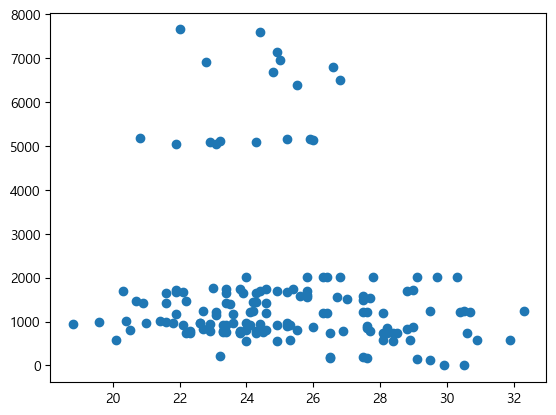

In [6]:
from matplotlib import pyplot as plt
#%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그래프를 볼 수 있게 하는 기능

plt.rc('font', family='Malgun Gothic')
plt.scatter(df['스트레스'], df['고혈압']) 
plt.show() #그래프 표시


In [8]:
correlation = df.corr()
print(correlation)

           고혈압      스트레스
고혈압   1.000000 -0.130572
스트레스 -0.130572  1.000000


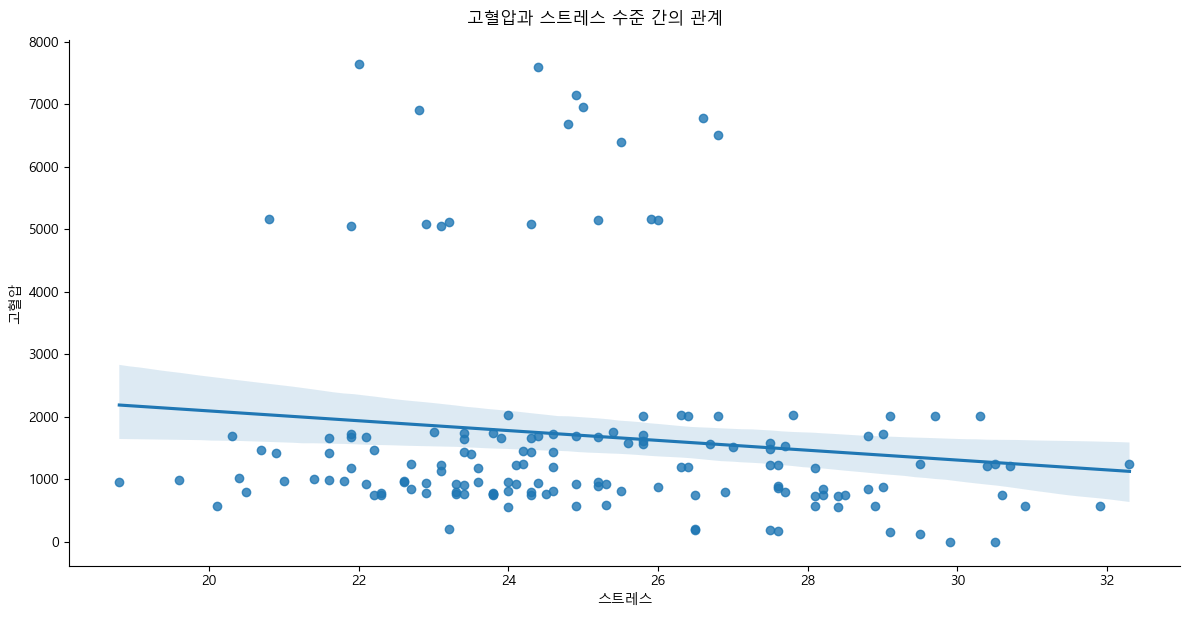

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.lmplot(x='스트레스', y='고혈압', data=df, height=6, aspect=2)
plt.suptitle('고혈압과 스트레스 수준 간의 관계', y=1.02)
plt.show()